In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib as mpl
from salishsea_tools import viz_tools

In [3]:
import salishsea_tools.river_202108 as rivers

def river_box(w_shed, r_call, box_side):  #TODO: change either box location or change box to circle
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 897-box_side*2
        river_range[1] = 897

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})

In [5]:
# dimensions: gridY, gridX, time
vol_2023_mon_top01 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023)).isel(depth=slice(0,1))
vol_2022_mon_top01 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022)).isel(depth=slice(0,1))
vol_2021_mon_top01 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021)).isel(depth=slice(0,1))
vol_2020_mon_top01 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020)).isel(depth=slice(0,1))
vol_2019_mon_top01 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019)).isel(depth=slice(0,1))

In [6]:
volume_top01 = volume.isel(depth=slice(0,1)).sum(dim='depth')

In [7]:
conc_2023_mon_top01 = vol_2023_mon_top01.sum(dim='depth') / volume_top01
conc_2022_mon_top01 = vol_2022_mon_top01.sum(dim='depth') / volume_top01
conc_2021_mon_top01 = vol_2021_mon_top01.sum(dim='depth') / volume_top01
conc_2020_mon_top01 = vol_2020_mon_top01.sum(dim='depth') / volume_top01
conc_2019_mon_top01 = vol_2019_mon_top01.sum(dim='depth') / volume_top01

In [8]:
box_size = 22
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

boxcalls = [Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish]
boxnames = ['Nooksack', 'Skagit', 'Snohomish', 'Nisqually', 'Elwha', 'Cowichan', 'Nanaimo', 'Puntledge', 'Salmon', 'Homathko', 'Squamish']

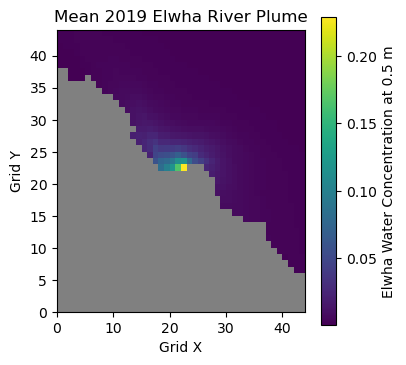

In [12]:
# months_mask = ((conc_2019_mon_top01['time'].dt.month >= 9) & (conc_2019_mon_top01['time'].dt.month <= 12)) | \
#                ((conc_2019_mon_top01['time'].dt.month >= 1) & (conc_2019_mon_top01['time'].dt.month <= 2))

fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.suptitle('')
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

this_p_var = 'elwha_river'
# plume_sel = conc_2019_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1]), time=months_mask).mean(dim='time')
plume_sel = conc_2019_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1])).mean(dim='time')
concentration = np.ma.masked_array(plume_sel, mask=tmask[0].isel(x=slice(Elwha[2], Elwha[3]), y=slice(Elwha[0], Elwha[1])))
colours = ax.pcolormesh(concentration, cmap=cmap)
ax.set_title('Mean 2019 Elwha River Plume')
cb = fig.colorbar(colours, ax=ax, label='Elwha Water Concentration at 0.5 m')
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax);

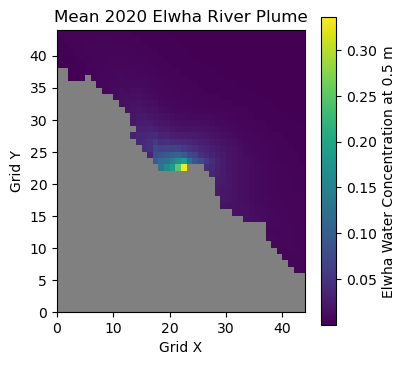

In [13]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.suptitle('')
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

this_p_var = 'elwha_river'
# plume_sel = conc_2020_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1]), time=months_mask).mean(dim='time')
plume_sel = conc_2020_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1])).mean(dim='time')
concentration = np.ma.masked_array(plume_sel, mask=tmask[0].isel(x=slice(Elwha[2], Elwha[3]), y=slice(Elwha[0], Elwha[1])))
colours = ax.pcolormesh(concentration, cmap=cmap)
ax.set_title('Mean 2020 Elwha River Plume')
cb = fig.colorbar(colours, ax=ax, label='Elwha Water Concentration at 0.5 m')
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax);

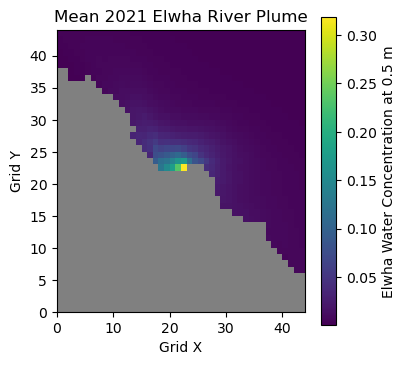

In [14]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.suptitle('')
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

this_p_var = 'elwha_river'
# plume_sel = conc_2021_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1]), time=months_mask).mean(dim='time')
plume_sel = conc_2021_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1])).mean(dim='time')
concentration = np.ma.masked_array(plume_sel, mask=tmask[0].isel(x=slice(Elwha[2], Elwha[3]), y=slice(Elwha[0], Elwha[1])))
colours = ax.pcolormesh(concentration, cmap=cmap)
ax.set_title('Mean 2021 Elwha River Plume')
cb = fig.colorbar(colours, ax=ax, label='Elwha Water Concentration at 0.5 m')
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax);

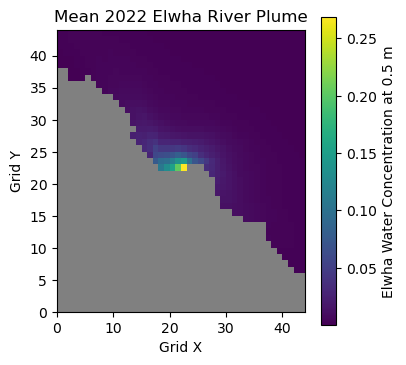

In [15]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.suptitle('')
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

this_p_var = 'elwha_river'
# plume_sel = conc_2022_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1]), time=months_mask).mean(dim='time')
plume_sel = conc_2022_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1])).mean(dim='time')
concentration = np.ma.masked_array(plume_sel, mask=tmask[0].isel(x=slice(Elwha[2], Elwha[3]), y=slice(Elwha[0], Elwha[1])))
colours = ax.pcolormesh(concentration, cmap=cmap)
ax.set_title('Mean 2022 Elwha River Plume')
cb = fig.colorbar(colours, ax=ax, label='Elwha Water Concentration at 0.5 m')
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax);

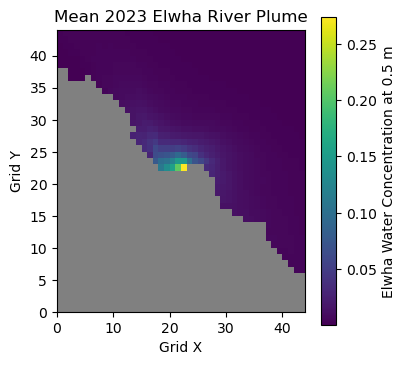

In [16]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.suptitle('')
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

this_p_var = 'elwha_river'
# plume_sel = conc_2023_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1]), time=months_mask).mean(dim='time')
plume_sel = conc_2023_mon_top01[this_p_var].isel(gridX=slice(Elwha[2], Elwha[3]), gridY=slice(Elwha[0], Elwha[1])).mean(dim='time')
concentration = np.ma.masked_array(plume_sel, mask=tmask[0].isel(x=slice(Elwha[2], Elwha[3]), y=slice(Elwha[0], Elwha[1])))
colours = ax.pcolormesh(concentration, cmap=cmap)
ax.set_title('Mean 2023 Elwha River Plume')
cb = fig.colorbar(colours, ax=ax, label='Elwha Water Concentration at 0.5 m')
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
viz_tools.set_aspect(ax);